<a href="https://www.kaggle.com/rjtalha/talha-khan-fraud-detection-work?scriptVersionId=88322144" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('../input/creditcardfraud/creditcard.csv')
df = data.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


<AxesSubplot:>

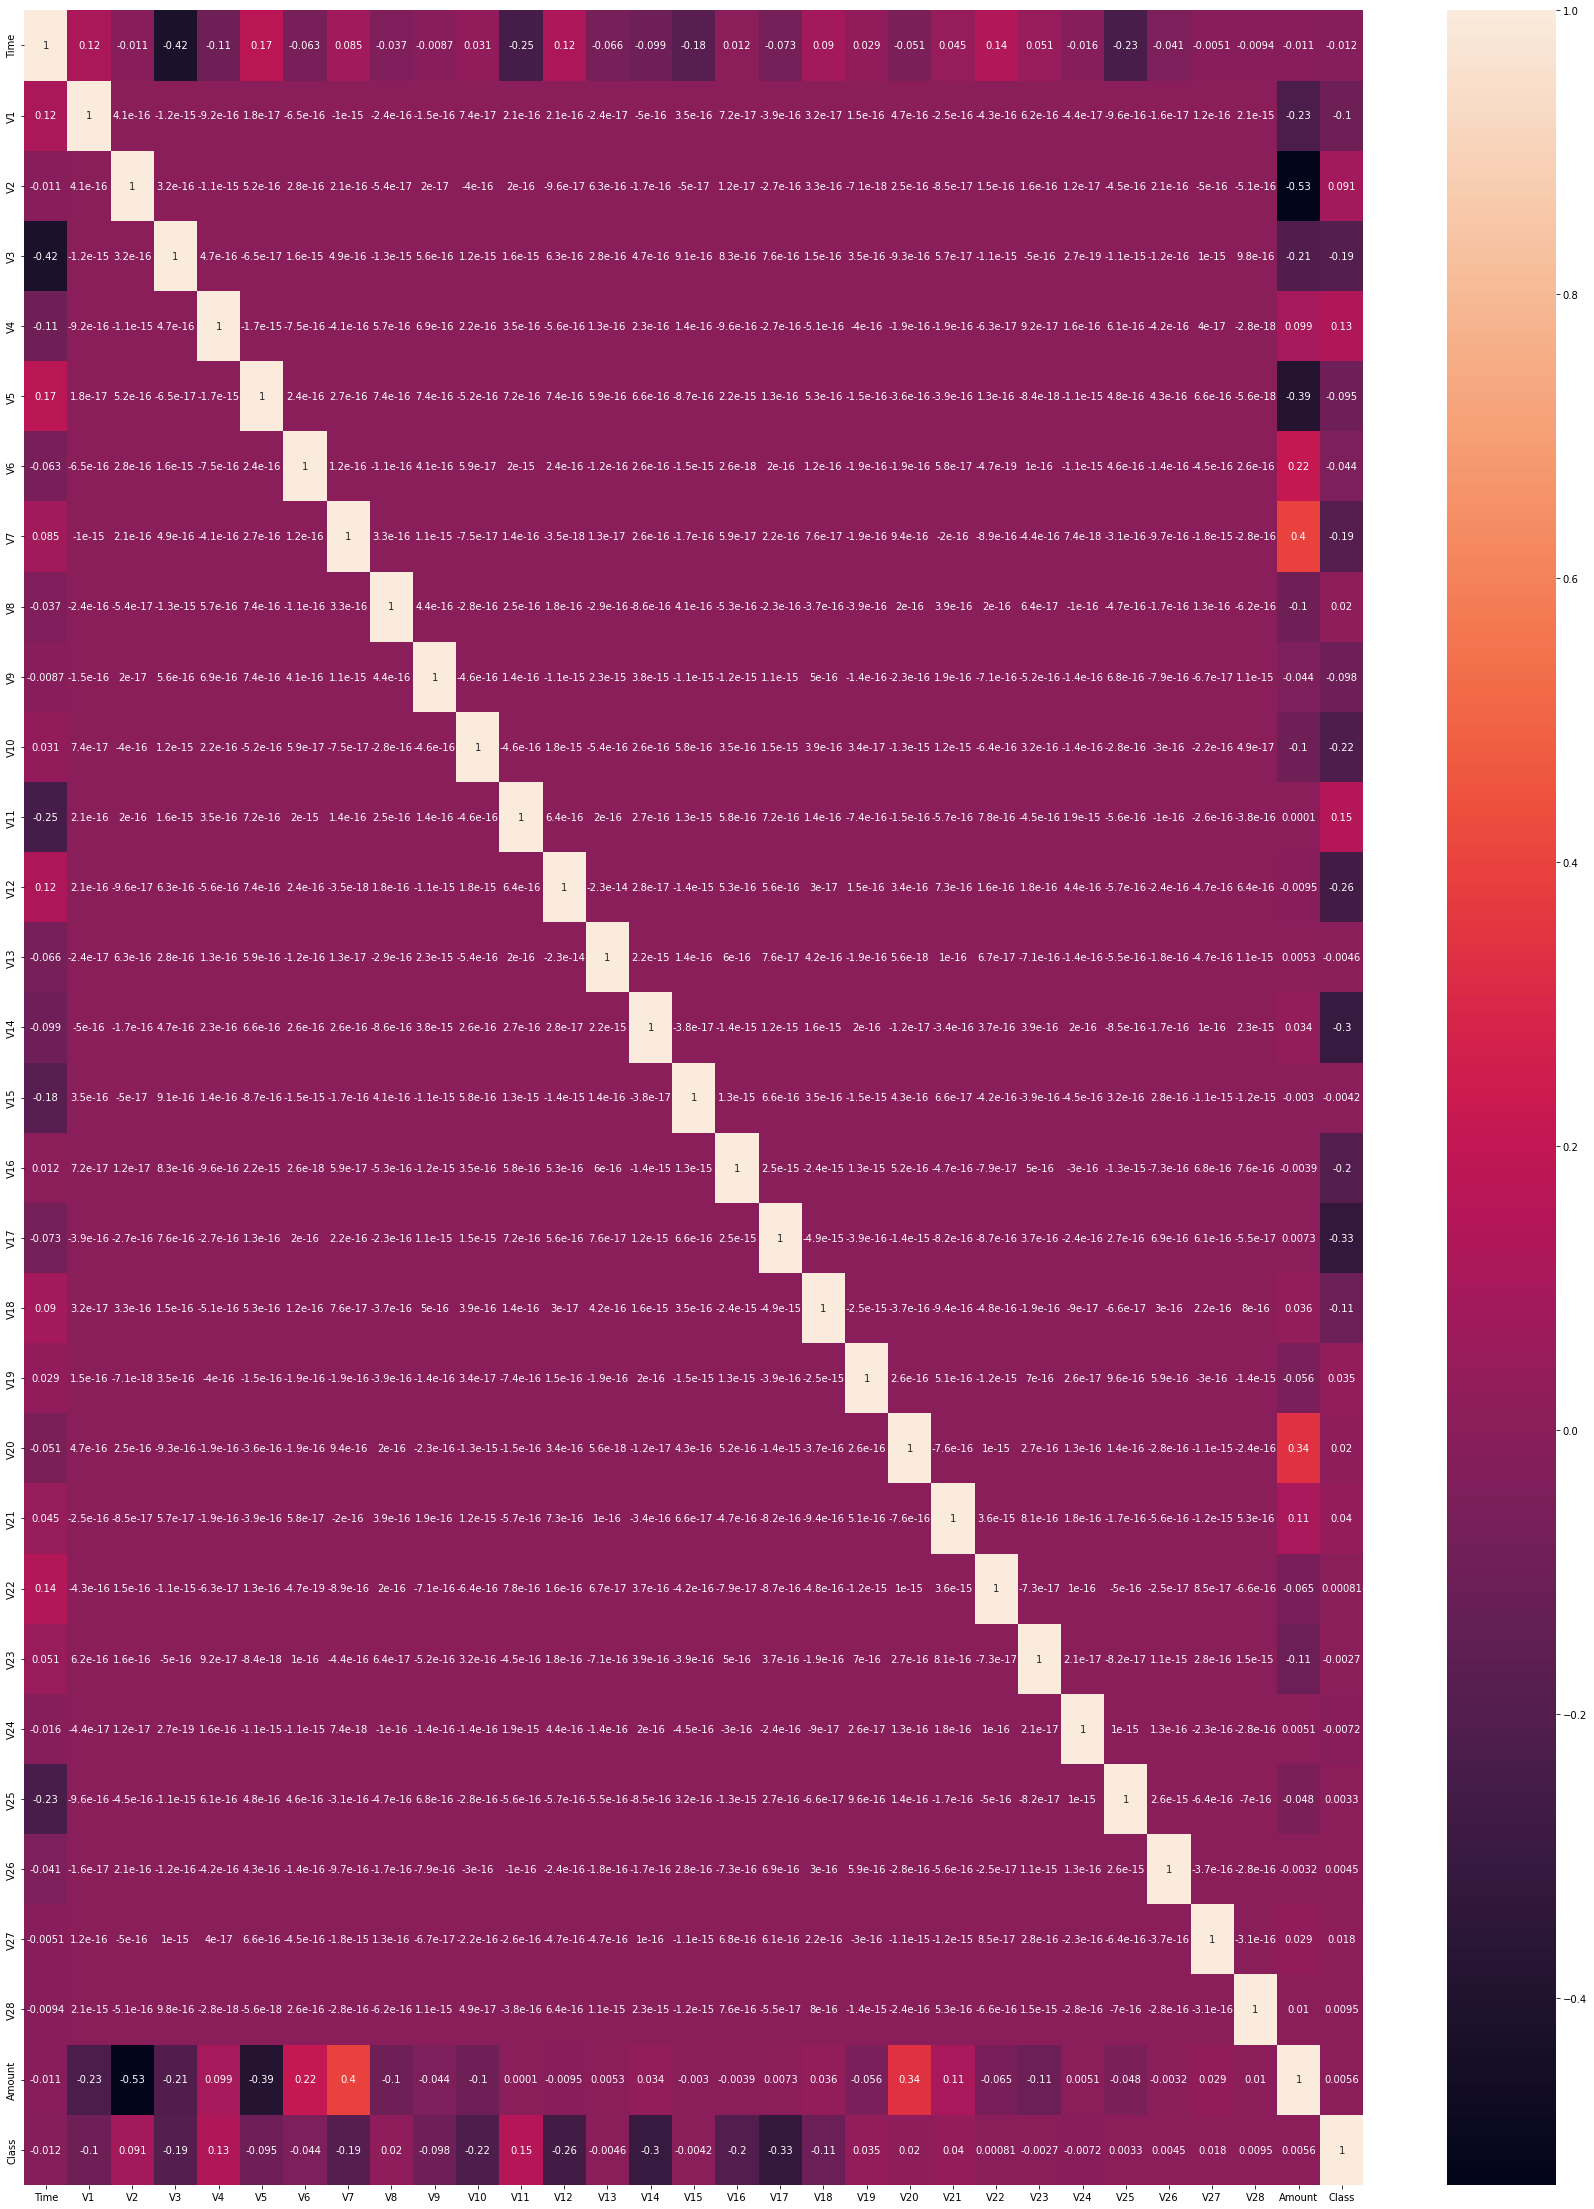

In [4]:
cor = df.corr()
plt.figure(figsize=(30,40))
sns.heatmap(cor,annot = True)

In [5]:
df.shape

(284807, 31)

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
def plot(df):
    import seaborn as sns
    sns.countplot('Class',data = df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


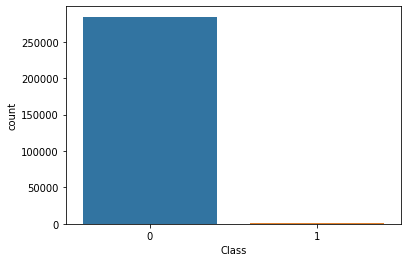

In [8]:
plot(df)

In [9]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
class_0, class_1  = df.Class.value_counts()[0] , df.Class.value_counts()[1]
print(class_0,class_1)

284315 492


In [11]:
df_class_0 , df_class_1 = df[df['Class'] ==0] , df[df['Class'] ==1]
print(df_class_0.shape , df_class_1.shape)

(284315, 31) (492, 31)


In [12]:
df_class_1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [13]:
df_0 = df_class_0.sample(class_1)
df_undersample = pd.concat([df_0, df_class_1])
df_undersample.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


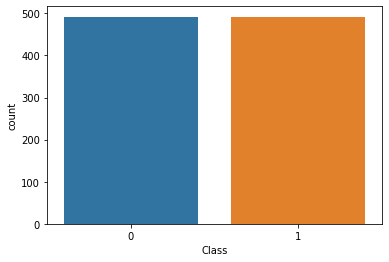

In [14]:
plot(df_undersample)

In [15]:
def analye(df):
    
    y = df[['Class']]
    x = df.drop('Class', axis = 1)
    scaler = MinMaxScaler()
    x_scaled = scaler.fit_transform(x)
    X = pd.DataFrame(x_scaled, columns = x.columns)
    
    #print(pd.get_dummies(X))
    
    x_train,x_test , y_train, y_test = train_test_split(X,y, random_state = 15, shuffle = True)
    #print(y_train)
    model = DecisionTreeClassifier(max_depth=3,criterion = 'gini', min_samples_leaf = 2)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    
    
    print(classification_report(pred,y_test))

    return pred,model, X,y

In [16]:
model,pred,X,y = analye(df_undersample)

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       143
           1       0.78      0.98      0.87       103

    accuracy                           0.88       246
   macro avg       0.88      0.89      0.88       246
weighted avg       0.90      0.88      0.88       246



In [17]:
df_1 = df_class_1.sample(class_0, replace = True)
df_oversample = pd.concat([df_1, df_class_0])
df_oversample.Class.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

In [18]:
pred ,model,X,y = analye(df_oversample)

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     76507
           1       0.90      0.98      0.94     65651

    accuracy                           0.94    142158
   macro avg       0.94      0.94      0.94    142158
weighted avg       0.94      0.94      0.94    142158



# Now getting Important Features

In [19]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.0643515 ,
       0.        , 0.        , 0.        , 0.0201484 , 0.        ,
       0.00118868, 0.        , 0.0183261 , 0.        , 0.88420656,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01177876, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [20]:
features_tuple = list(zip(X.columns, model.feature_importances_))

In [21]:
feature_imp = pd.DataFrame(features_tuple, columns=[
                           "Feature Names", "Importance"])
feature_imp.head()

,Feature Names,Importance
0,Time,0.000000
1,V1,0.000000
2,V2,0.000000
3,V3,0.000000
4,V4,0.064351


In [22]:
feature_imp = feature_imp.sort_values("Importance", ascending=False)
feature_imp.head()

,Feature Names,Importance
14,V14,0.884207
4,V4,0.064351
8,V8,0.020148
12,V12,0.018326
20,V20,0.011779


Text(0.5, 1.0, 'Random Forest Classifier - Features Importance')

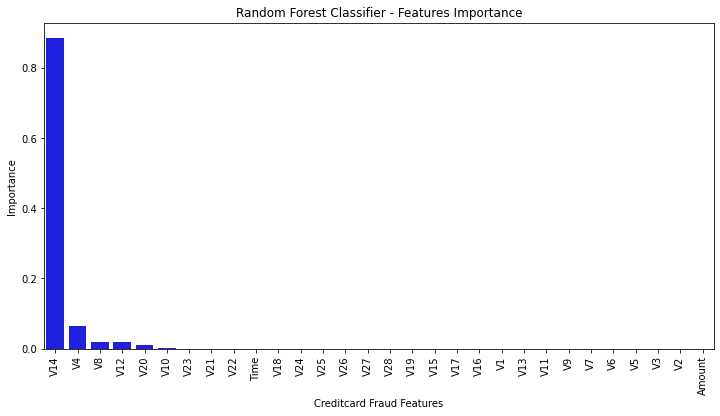

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Feature Names", y="Importance", data=feature_imp, color='b')
plt.xlabel("Creditcard Fraud Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Random Forest Classifier - Features Importance")

In [24]:
X = X.loc[:,feature_imp['Feature Names'][:5]]

X.head()

,V14,V4,V8,V12,V20
0,0.351664,0.519190,0.734262,0.510362,0.568377
1,0.469553,0.421232,0.794930,0.433334,0.582439
2,0.546218,0.424528,0.789083,0.703342,0.579354
3,0.392003,0.493438,0.790982,0.570706,0.582006
4,0.375834,0.437261,0.840752,0.445805,0.588984


In [25]:
x_train,x_test , y_train, y_test = train_test_split(X,y, random_state = 15, shuffle = True)
   
model = DecisionTreeClassifier(max_depth=3,criterion = 'gini', min_samples_leaf = 2)
model.fit(x_train,y_train)
pred = model.predict(x_test)
    
    
print(classification_report(pred,y_test))


              precision    recall  f1-score   support

           0       0.98      0.91      0.94     76504
           1       0.90      0.98      0.94     65654

    accuracy                           0.94    142158
   macro avg       0.94      0.94      0.94    142158
weighted avg       0.94      0.94      0.94    142158



In [26]:
import pickle
pickle.dump(model,open('fraud_detection.pkl','wb'))

In [27]:
model_load = pickle.load(open('fraud_detection.pkl', 'rb'))

In [28]:
X.head()

,V14,V4,V8,V12,V20
0,0.351664,0.519190,0.734262,0.510362,0.568377
1,0.469553,0.421232,0.794930,0.433334,0.582439
2,0.546218,0.424528,0.789083,0.703342,0.579354
3,0.392003,0.493438,0.790982,0.570706,0.582006
4,0.375834,0.437261,0.840752,0.445805,0.588984


In [29]:
model_load.predict(X.iloc[0:2])

array([1, 1])

In [30]:
y[0:2]

,Class
167184,1
6472,1
